# Diabetics Prediction

# Overview of the problem statement

# Objective 

# Data Description

In [2]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [25]:
#Read the data
data=pd.read_excel('cdc diabetics.xlsx')
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


# Data Collection

In [26]:
#Data is taken from UCI about the diabeticd prediction using health indicators
#Print the column names in dataset
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [27]:
data.shape #Shape of the dataset

(70692, 22)

# Data Preprocessing and Data cleaning

In [28]:
#Delete unnecessary columns from dataset
data = data.drop(['Income','Education','Sex'], axis=1)
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
0,0,1,0,1,26,0,0,0,1,0,1,0,1,0,3,5,30,0,4
1,0,1,1,1,26,1,1,0,0,1,0,0,1,0,3,0,0,0,12
2,0,0,0,1,26,0,0,0,1,1,1,0,1,0,1,0,10,0,13
3,0,1,1,1,28,1,0,0,1,1,1,0,1,0,3,0,3,0,11
4,0,0,0,1,29,1,0,0,1,1,1,0,1,0,2,0,0,0,8


In [29]:
#calculate shape of dataset
data.shape

(70692, 19)

In [30]:
#Find statistical table
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,8.584055
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,2.852153
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,7.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,13.000000


In [31]:
#Finding is there any null values are present
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
dtype: int64

No null values are present in dataset

In [32]:
data.duplicated().sum()
print("Data duplicated in dataset is:",data.duplicated().sum())

Data duplicated in dataset is: 8594


In [33]:
#Removing duplicates
data = data.drop_duplicates()
data.duplicated().sum()

0

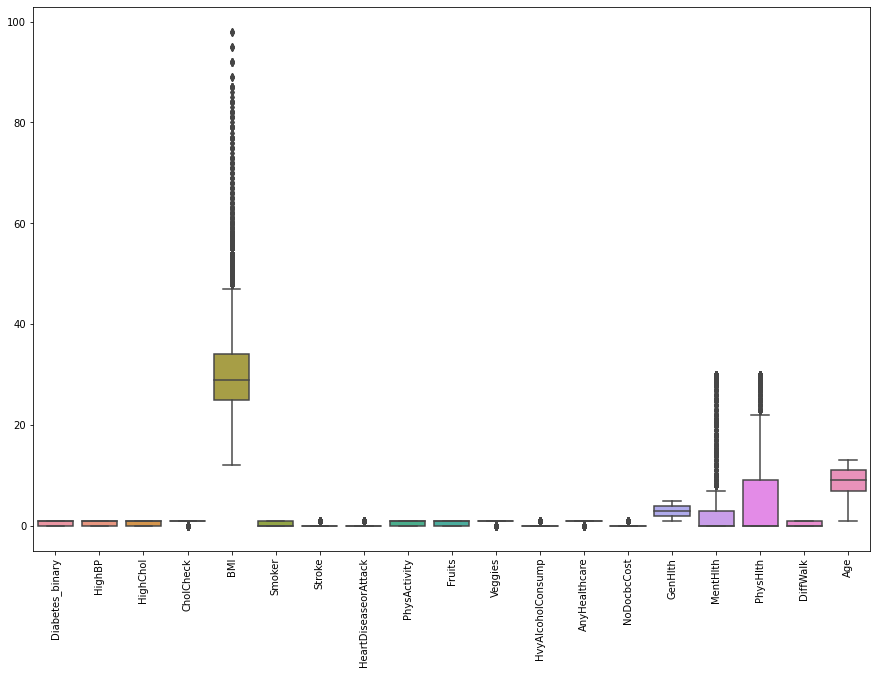

In [34]:
# Detect outliers visually using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [42]:
#IQR mehid
Q1 = data.quantile(0.25)  # First quartile
Q3 = data.quantile(0.75)  # Third quartile
IQR = Q3 - Q1             # Interquartile range

# Filter the dataset to remove outliers
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape after outlier removal:", data.shape)


Shape after outlier removal: (7668, 19)


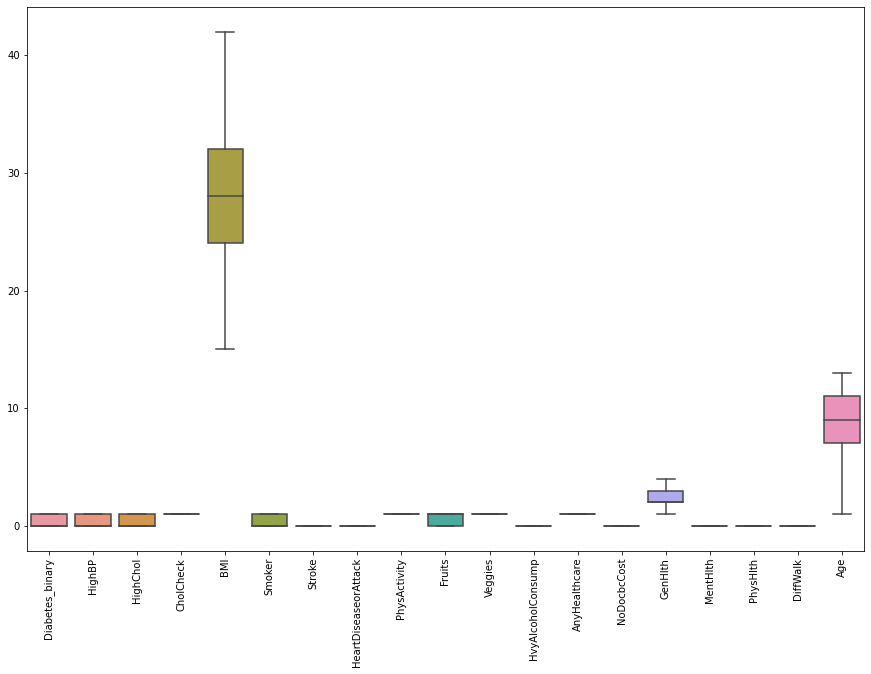

In [43]:
# Boxplots after ouliers are removed
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [44]:
# Check skewness of each feature
print(data.skew())

Diabetes_binary         0.346300
HighBP                  0.132816
HighChol                0.188135
CholCheck               0.000000
BMI                     0.334947
Smoker                  0.251892
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Fruits                 -0.591410
Veggies                 0.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           0.000000
NoDocbcCost             0.000000
GenHlth                 0.125048
MentHlth                0.000000
PhysHlth                0.000000
DiffWalk                0.000000
Age                    -0.511588
dtype: float64


In [45]:
num_cols = data.select_dtypes(include='number').columns
skewness = data[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

In [46]:
print(no_skewness)

Diabetes_binary         0.346300
HighBP                  0.132816
HighChol                0.188135
CholCheck               0.000000
BMI                     0.334947
Smoker                  0.251892
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Veggies                 0.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           0.000000
NoDocbcCost             0.000000
GenHlth                 0.125048
MentHlth                0.000000
PhysHlth                0.000000
DiffWalk                0.000000
dtype: float64


In [47]:
print(moderate_skewness)

Fruits   -0.591410
Age      -0.511588
dtype: float64


In [48]:
print(high_skewness)

Series([], dtype: float64)


# Exploratory Data Analysis (EDA)

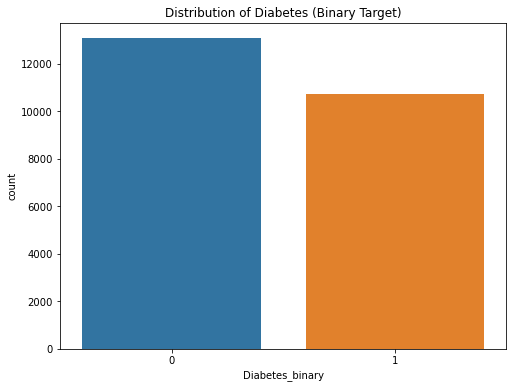

In [42]:
#Visualise the data where count to evaluate 
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=data)
plt.title("Distribution of Diabetes (Binary Target)")
plt.show()

Here diabetic patients are less than the patients without diabetics

In [50]:
# Select numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

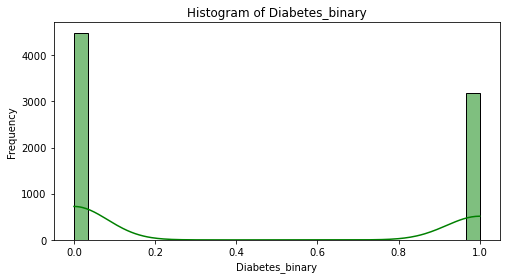

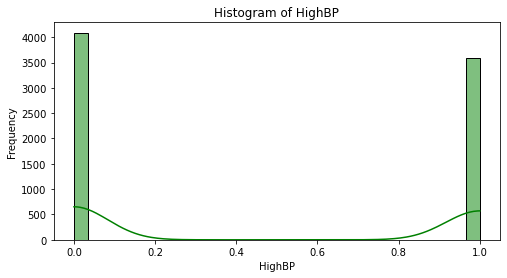

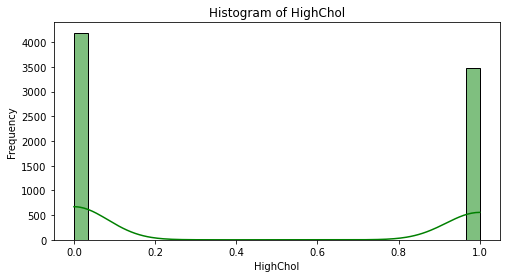

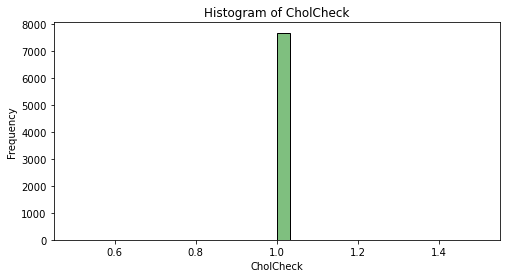

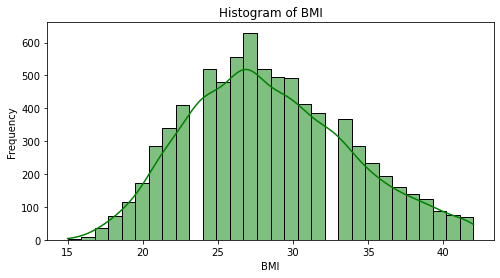

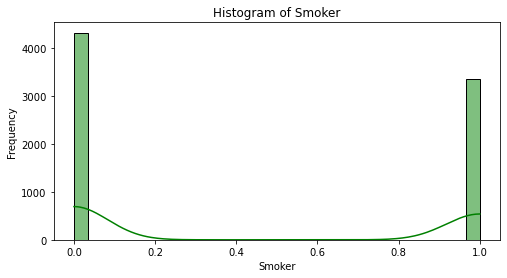

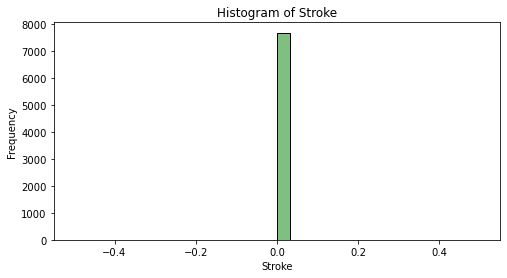

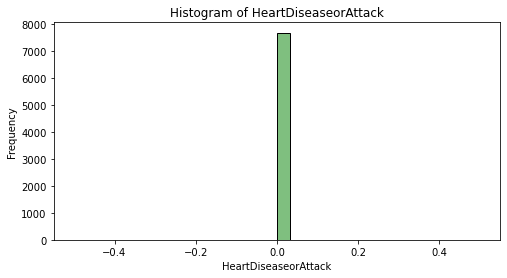

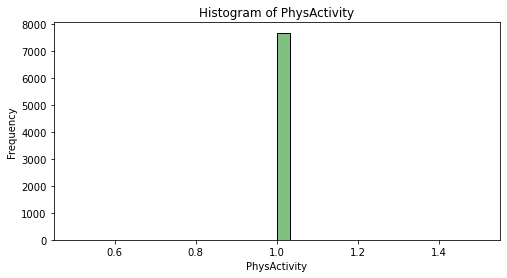

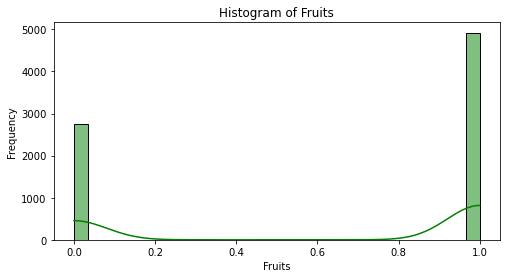

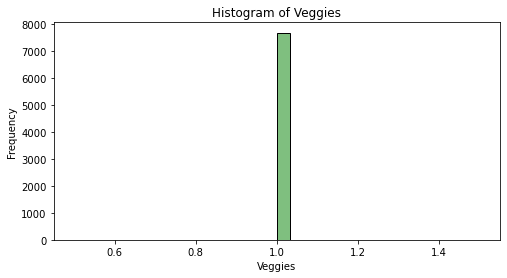

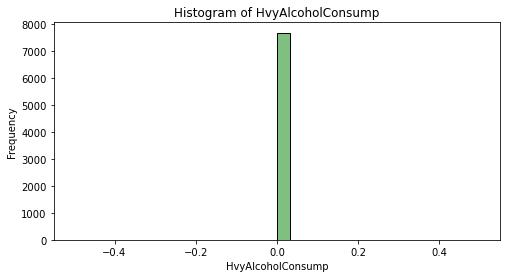

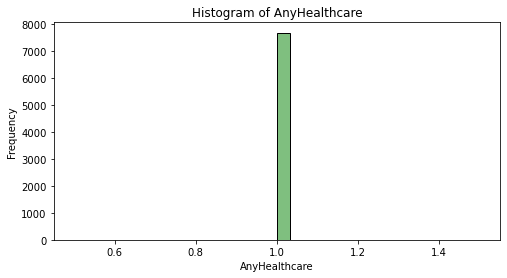

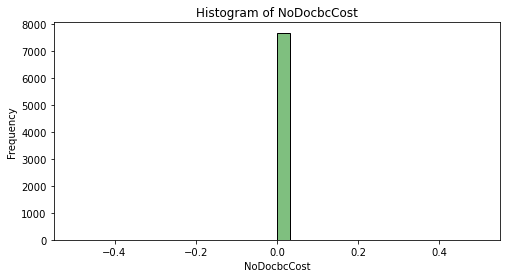

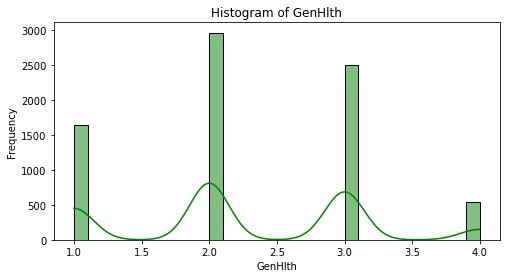

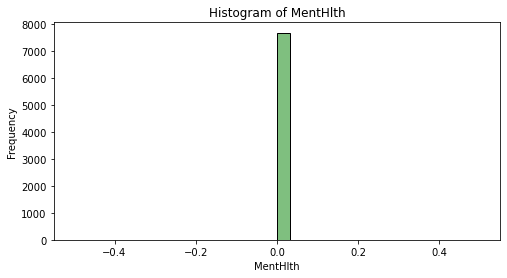

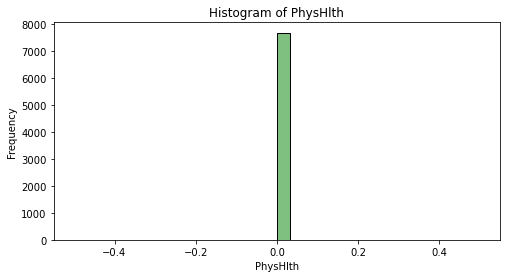

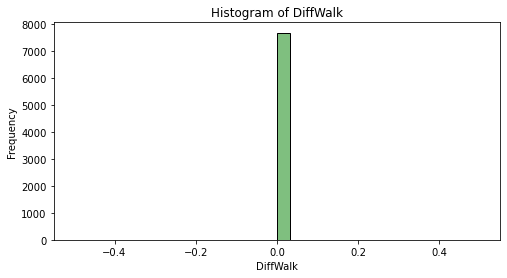

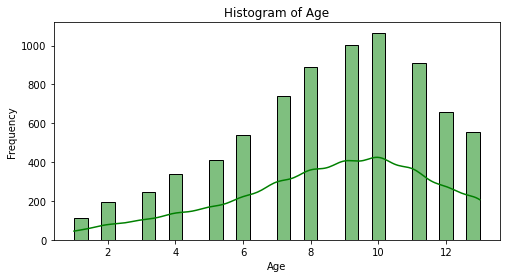

In [53]:
#Histogram
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='green')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


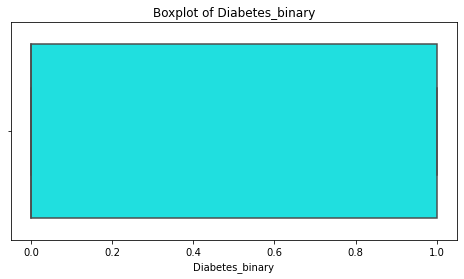

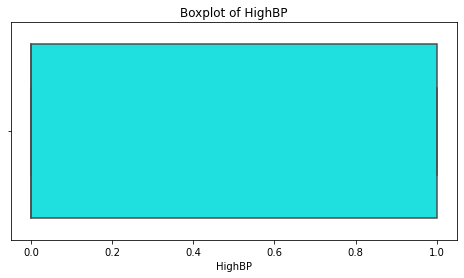

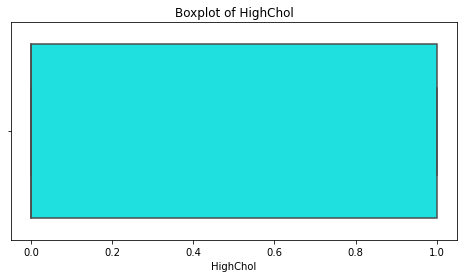

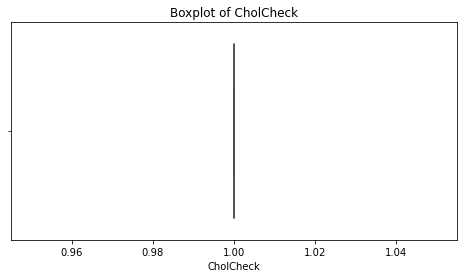

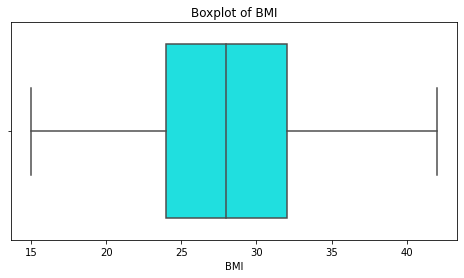

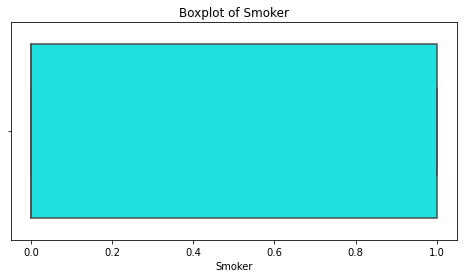

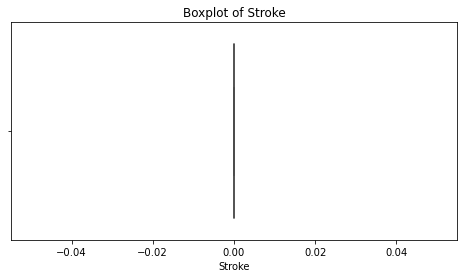

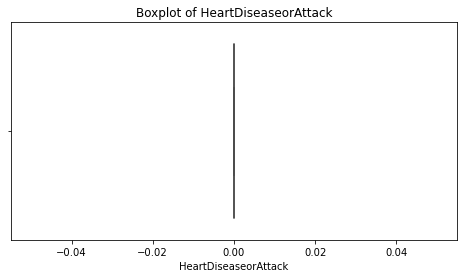

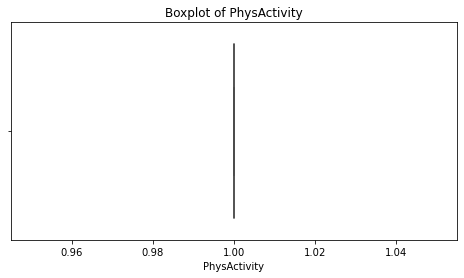

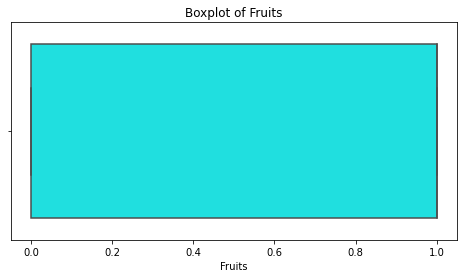

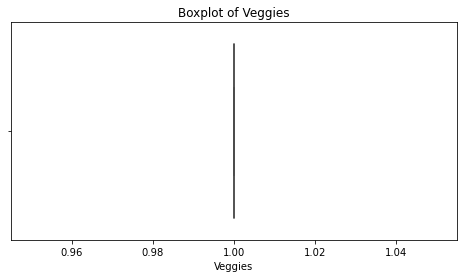

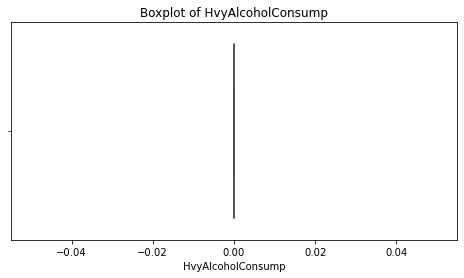

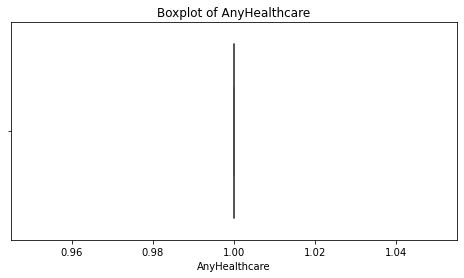

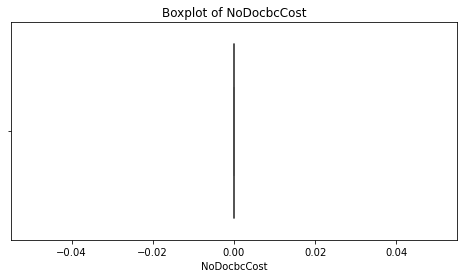

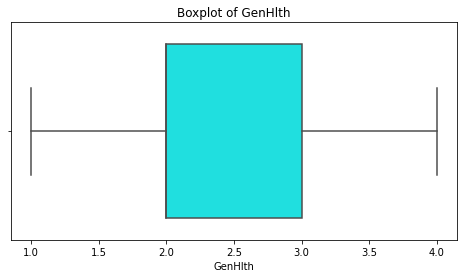

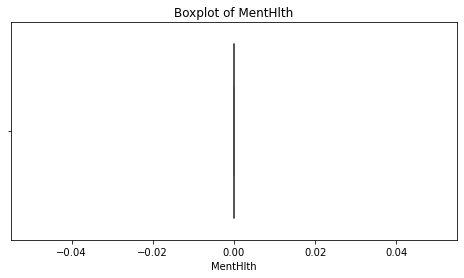

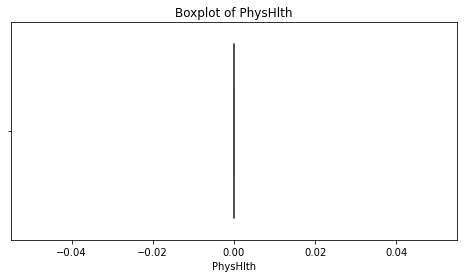

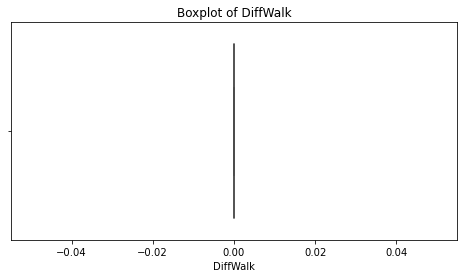

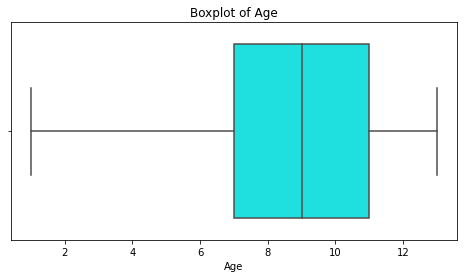

In [55]:
#Boxplot
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature], color='cyan')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

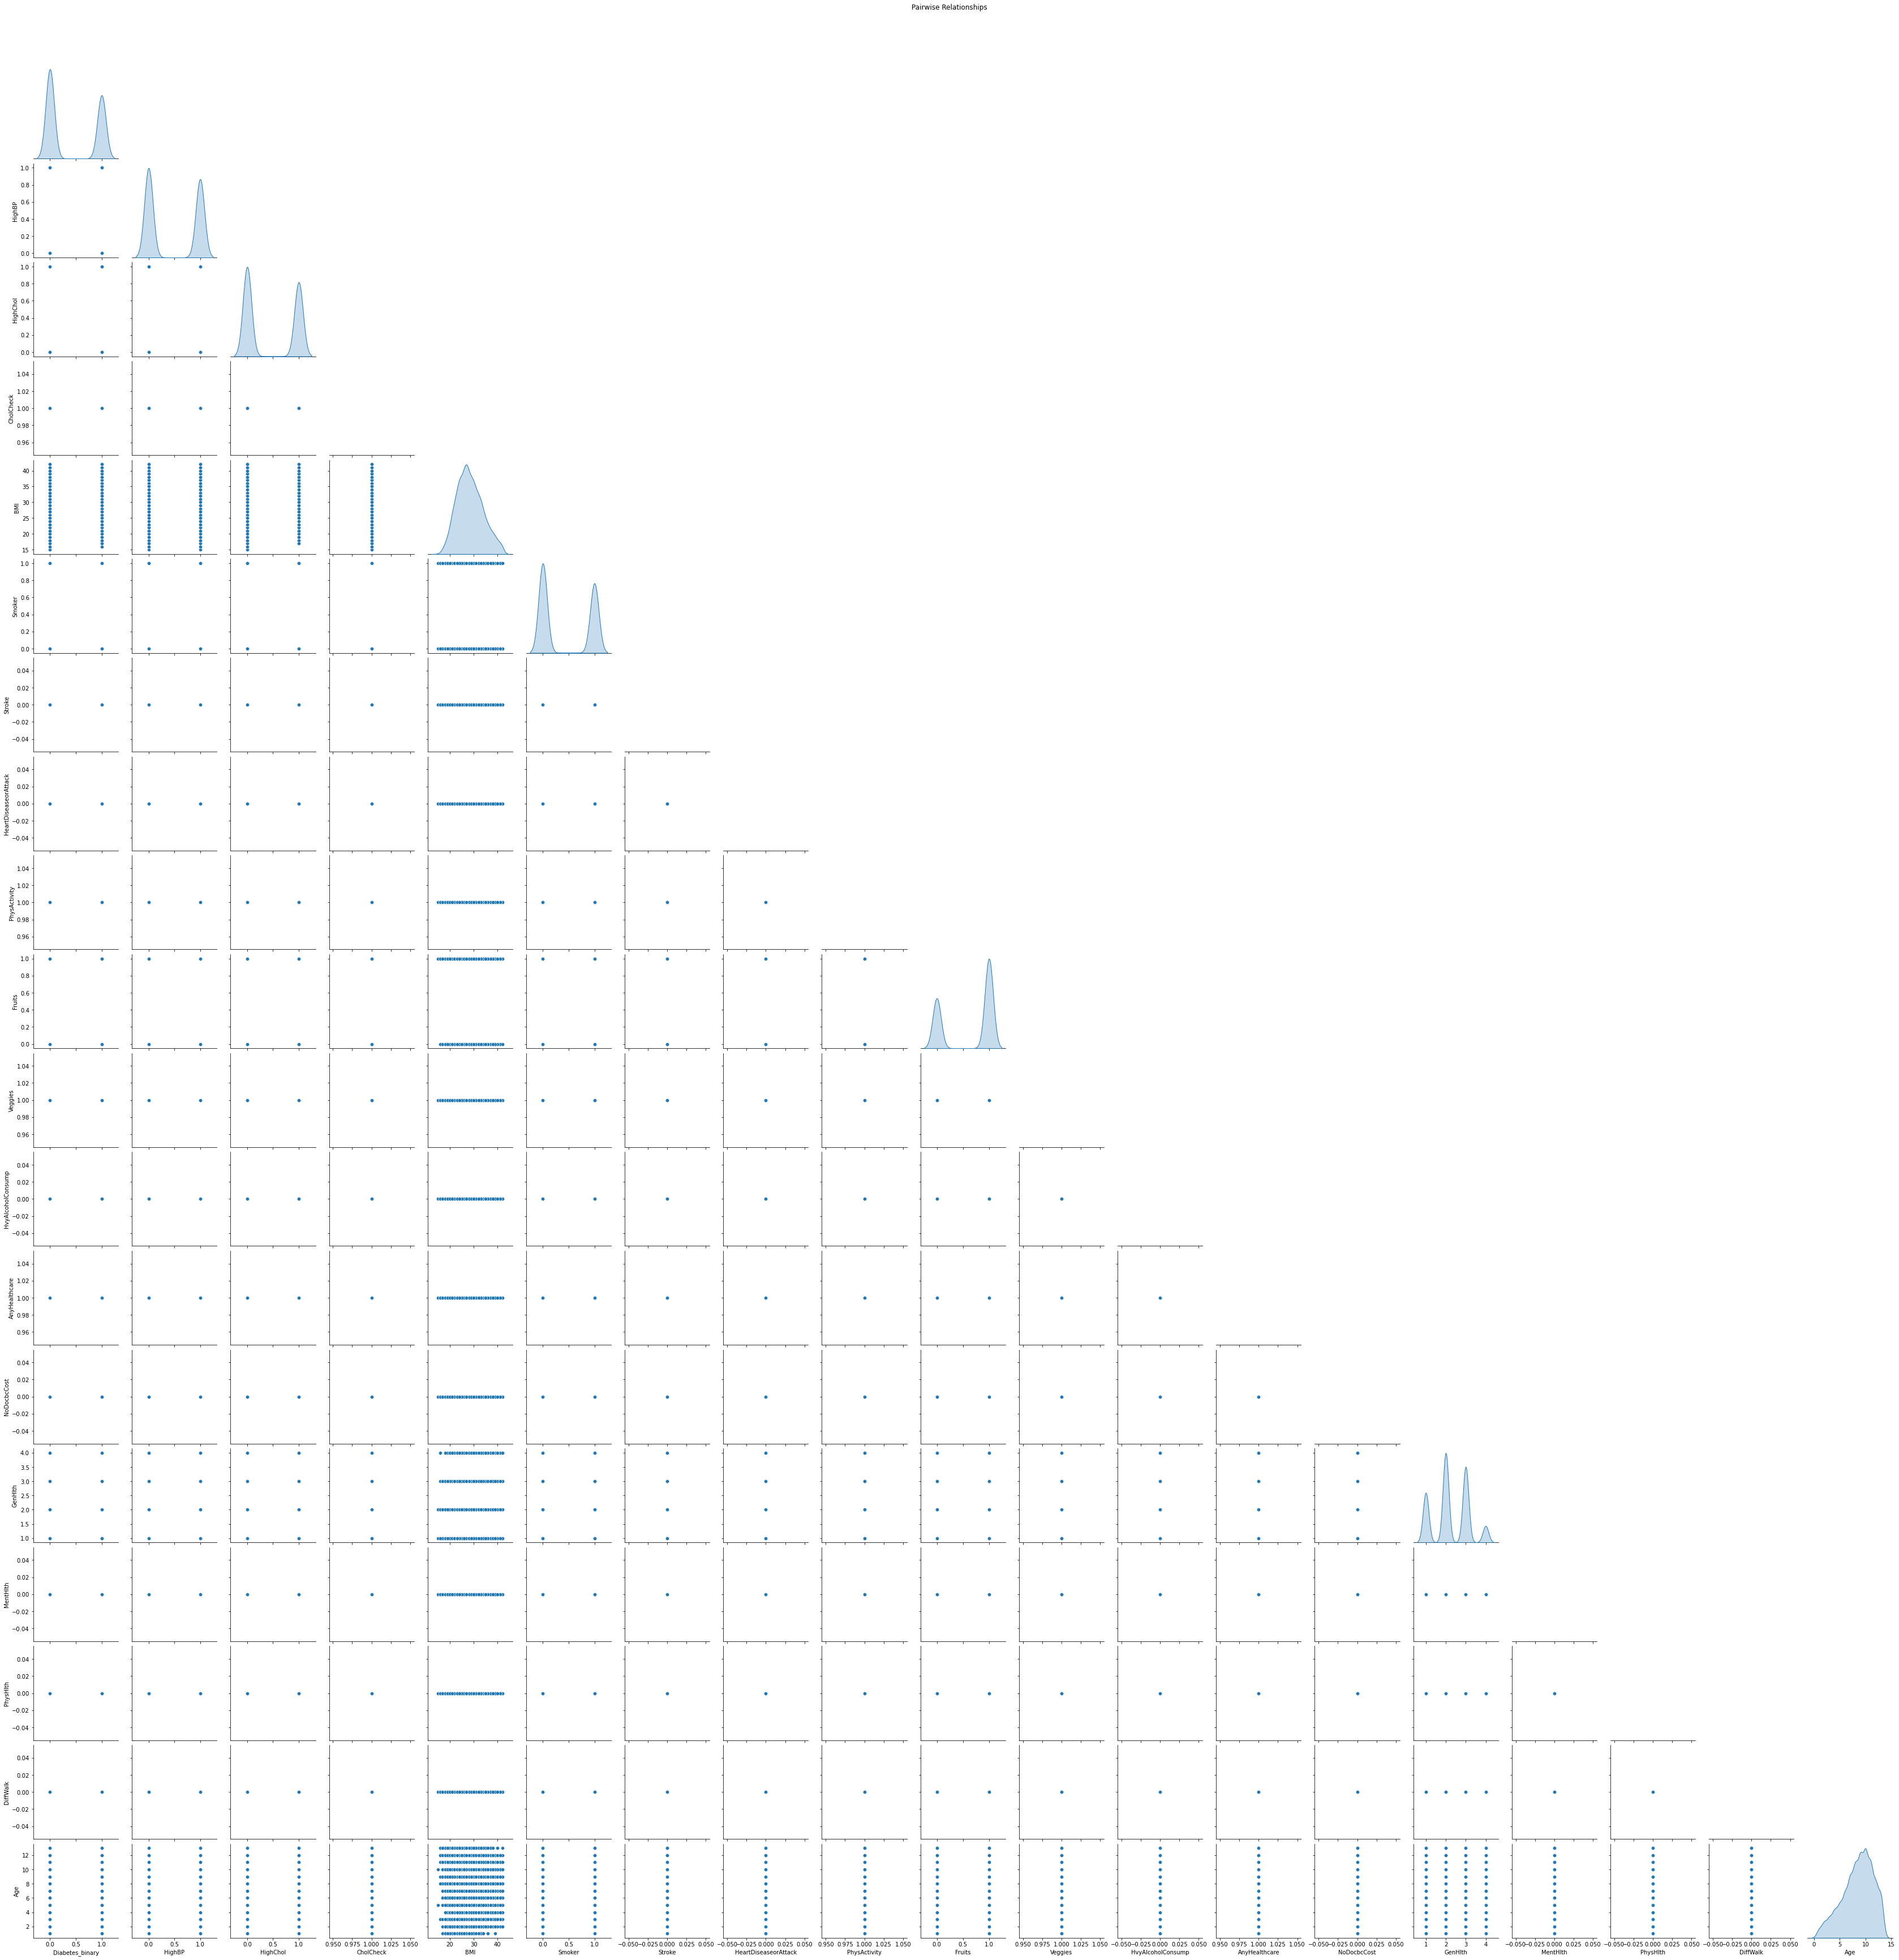

In [57]:
#Pair plot
sns.pairplot(data[numerical_features], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


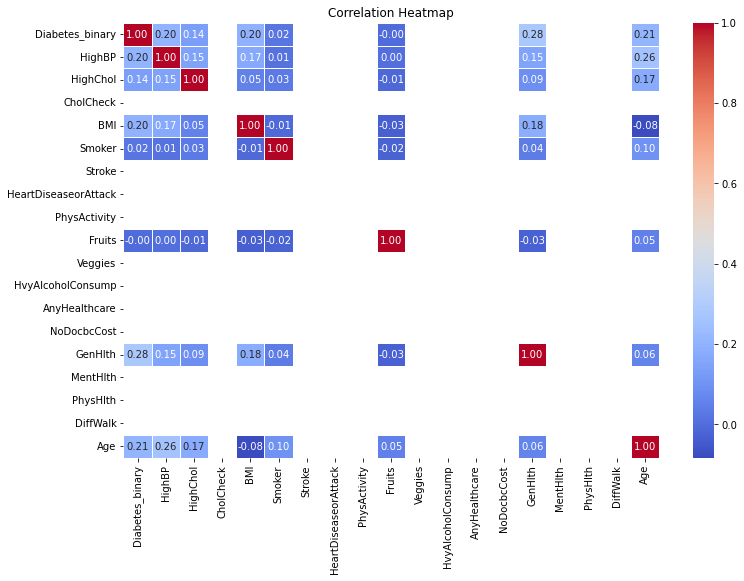

In [59]:
#Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Features like HighBP (high blood pressure) and CholCheck may show stronger correlations with the target (diabetes_binary).
This indicates these variables could be significant predictors for diabetes.

# Feature Engineering

In [65]:
# Apply one-hot encoding
df_one_hot = pd.get_dummies(data, columns=categorical_features, drop_first=True)
print("One-Hot Encoded DataFrame:")
df_one_hot.head()


One-Hot Encoded DataFrame:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
4,0,0,0,1,29,1,0,0,1,1,1,0,1,0,2,0,0,0,8
8,0,0,0,1,32,0,0,0,1,1,1,0,1,0,3,0,0,0,3
11,0,0,0,1,21,0,0,0,1,1,1,0,1,0,1,0,0,0,4
12,0,1,1,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,7
16,0,0,0,1,30,0,0,0,1,0,1,0,1,0,2,0,0,0,9


# Feature Selection

In [67]:
# Feature Selection using correlation
correlation = data.corr()
relevant_features = correlation['Diabetes_binary'][abs(correlation['Diabetes_binary']) > 0.3]
print("Relevant features:\n", relevant_features)

Relevant features:
 Diabetes_binary    1.0
Name: Diabetes_binary, dtype: float64


In [69]:
# Define target variable and features
X = data.drop(columns=['Diabetes_binary'])  
y = data['Diabetes_binary']

In [71]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
4,0,0,1,29,1,0,0,1,1,1,0,1,0,2,0,0,0,8
8,0,0,1,32,0,0,0,1,1,1,0,1,0,3,0,0,0,3
11,0,0,1,21,0,0,0,1,1,1,0,1,0,1,0,0,0,4
12,1,1,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,7
16,0,0,1,30,0,0,0,1,0,1,0,1,0,2,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70630,0,1,1,35,0,0,0,1,1,1,0,1,0,1,0,0,0,7
70646,0,0,1,27,1,0,0,1,1,1,0,1,0,3,0,0,0,8
70655,1,1,1,30,0,0,0,1,1,1,0,1,0,3,0,0,0,5
70661,1,1,1,24,0,0,0,1,1,1,0,1,0,4,0,0,0,13


In [72]:
y

4        0
8        0
11       0
12       0
16       0
        ..
70630    1
70646    1
70655    1
70661    1
70685    1
Name: Diabetes_binary, Length: 7668, dtype: int64

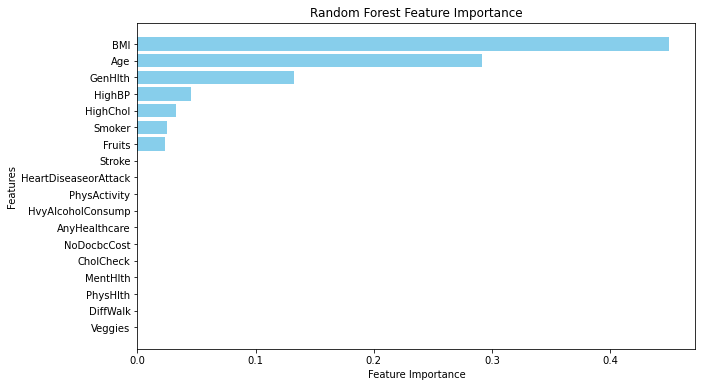

Top Features Selected by Random Forest:
3          BMI
17         Age
13     GenHlth
0       HighBP
1     HighChol
4       Smoker
8       Fruits
Name: Feature, dtype: object


In [73]:
from sklearn.ensemble import RandomForestClassifier


# Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 
                                     'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Select top features based on importance
top_features_rf = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
print("Top Features Selected by Random Forest:")
print(top_features_rf)


In [74]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top Features Selected by SelectKBest:")
print(selected_features)


Top Features Selected by SelectKBest:
Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Age'],
      dtype='object')


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  5  6  7  9 10 11 12 14 15 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [75]:
# Combine features from both methods
final_features = list(set(top_features_rf).union(set(selected_features)))

# Create a new DataFrame with selected features
X_selected = X[final_features]
print("Final Selected Features:")
print(final_features)


Final Selected Features:
['HighChol', 'Fruits', 'DiffWalk', 'PhysHlth', 'BMI', 'Age', 'Smoker', 'HighBP', 'GenHlth', 'MentHlth']


# Split Data into Training and Testing Sets

In [78]:
#Split the data to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [79]:
#Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)